## Best Fit Distribution on the Data 

In this kernel we cover different hypothesis tests for finding best fit distribution for the given Data.

### Distributions (which i check)  - Normal, Gamma, LogNormal, PearsonT3, Gumbel, Exponential Distribution 

### Hypotheis Tests 
1. Chi-Square Test
2. Kolmogorov-Smirnov (Ks-test) Test
3. Anderson Darling Test

BIC value check

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd 
from scipy import stats 
from scipy.stats import chi2, norm, kstest, anderson, gamma, lognorm, pearson3, gumbel_r, expon
import math
from matplotlib import pyplot as plt 

In [256]:
df = pd.read_csv('Data_hydro.csv')
df = df.iloc[:,0:5]
df.head()

,Data1,Data 2,Data3,Data4,Data5
0,3286.74,1695.29,4475.34,1574.26,1835.79
1,2442.10,1890.36,3082.96,1565.09,2184.20
2,761.86,2170.22,4022.13,1897.86,2172.26
3,2830.93,1893.26,3064.65,2319.02,2400.00
4,2842.53,2540.84,5098.13,2257.37,1927.20


In [257]:
Data1 = df.iloc[:,[0]]
Data1.head()

,Data1
0,3286.74
1,2442.10
2,761.86
3,2830.93
4,2842.53


In [258]:
#Moments of Data or Basic Info
Min = Data1.min(); Max = Data1.max(); Mean = Data1.mean(); Std = Data1.std()
print('Minimum : {}\nMaximum : {} \nMean : {} \nStd : {}'.format(Min.values,Max.values,Mean.values,Std.values))

Minimum : [584.03]
Maximum : [4015.93] 
Mean : [2425.63018868] 
Std : [865.92402243]


Text(0, 0.5, 'Counts')

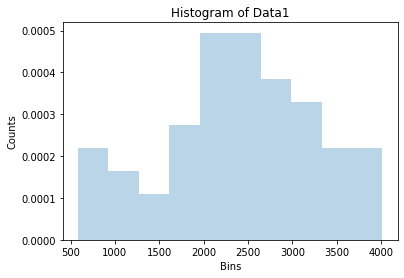

In [291]:
#Histogram
plt.hist(Data1.iloc[:,0],density=1,alpha=0.3)
plt.title('Histogram of Data1')
plt.xlabel('Bins')
plt.ylabel('Counts')

Parameters of Normal Distribution:  Mean: 2425.63   Standard Deviation: 857.72
Parameters of Gamma Distribution:   Alpha: 377.11   Beta: 44.46
Parameters of Log-Normal Distribution:   Mean: 584.03   Standard Deviation: 9.0
Parameters of Pearson T3 Distribution:   A(Scale): -0.4   B(Shape): 862.61
Parameters of Gumbel Distribution:   Alpha: 1988.17   Beta: 853.24
Parameters of Exponential Distribution:   A(Loc): 584.03   B(Scale): 1841.6


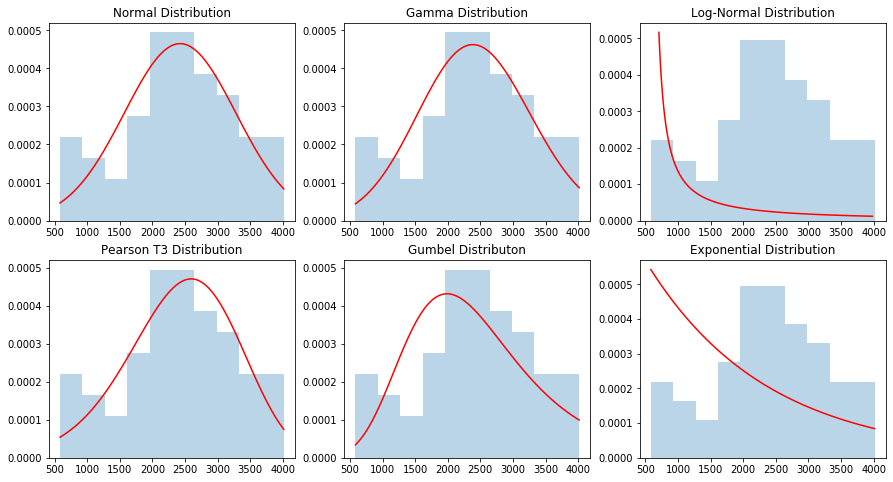

In [293]:
from scipy.stats import norm

#Normal Distribution
param = norm.fit(Data1)
x = np.linspace(Min,Max,100)
print('Parameters of Normal Distribution:  Mean: {}   Standard Deviation: {}'.format(round(param[0],2),round(param[1],2)))
pdf_fitted = norm.pdf(x, loc=param[0], scale=param[1])

#Gamma Distribution
fit_alpha,fit_loc, fit_beta = stats.gamma.fit(Data1.iloc[:,0])
print('Parameters of Gamma Distribution:   Alpha: {}   Beta: {}'.format(round(fit_alpha,2),round(fit_beta,2)))
pdf_fitted_gamma = gamma.pdf(x,fit_alpha,loc=fit_loc,scale=fit_beta)

#Log Normal Distribution
shape, loc, scale = lognorm.fit(Data1.iloc[:,0])
print('Parameters of Log-Normal Distribution:   Mean: {}   Standard Deviation: {}'.format(round(loc,2),round(scale,2)))
x1 = np.logspace(2.85,3.6, 100)
pdf_log = lognorm.pdf(x1, shape, loc, scale)

#Pearson T3 Distribution 
param_pearson = pearson3.fit(Data1.iloc[:,0])
print('Parameters of Pearson T3 Distribution:   A(Scale): {}   B(Shape): {}'.format(round(param_pearson[0],2),round(param_pearson[2],2)))
pdf_pearson = pearson3.pdf(x,*param_pearson[:-2], loc=param_pearson[-2], scale=param_pearson[-1])

#Gumbel Distribution 
param_gumbel = gumbel_r.fit(Data1.iloc[:,0])
print('Parameters of Gumbel Distribution:   Alpha: {}   Beta: {}'.format(round(param_gumbel[0],2),round(param_gumbel[1],2)))
pdf_gumbel = gumbel_r.pdf(x,loc=param_gumbel[0],scale=param_gumbel[1])

#Exponential Distribution
param_exp = expon.fit(Data1.iloc[:,0])
print('Parameters of Exponential Distribution:   A(Loc): {}   B(Scale): {}'.format(round(param_exp[0],2),round(param_exp[1],2)))
exp_pdf = expon.pdf(x,loc=param_exp[0],scale=param_exp[1])


fig, ax = plt.subplots(2,3,figsize=(15,8))

#Plotting Normal Distribution
ax[0,0].plot(x, pdf_fitted,'r-')
ax[0,0].set_title('Normal Distribution')
ax[0,0].hist(Data1.iloc[:,0],density=1,alpha=0.3)

##Plotting Gamma Distribution
ax[0,1].plot(x,pdf_fitted_gamma,'r-')
ax[0,1].set_title('Gamma Distribution')
ax[0,1].hist(Data1.iloc[:,0],density=1,alpha=0.3)

##Plotting Log-Normal Distribution
ax[0,2].plot(x1,pdf_log,'r-')
ax[0,2].set_title('Log-Normal Distribution')
ax[0,2].hist(Data1.iloc[:,0],density=1,alpha=0.3)

#Plotting Pearson-T3 Distribution
ax[1,0].plot(x,pdf_pearson,'r-')
ax[1,0].set_title('Pearson T3 Distribution')
ax[1,0].hist(Data1.iloc[:,0],density=1,alpha=0.3)

#Plotting Gumbel Distribution 
ax[1,1].plot(x,pdf_gumbel,'r-')
ax[1,1].set_title('Gumbel Distributon')
ax[1,1].hist(Data1.iloc[:,0],density=1,alpha=0.3)

#Plotting Exponential Distribution
ax[1,2].plot(x,exp_pdf,'r-')
ax[1,2].set_title('Exponential Distribution')
ax[1,2].hist(Data1.iloc[:,0],density=1,alpha=0.3)

plt.show()

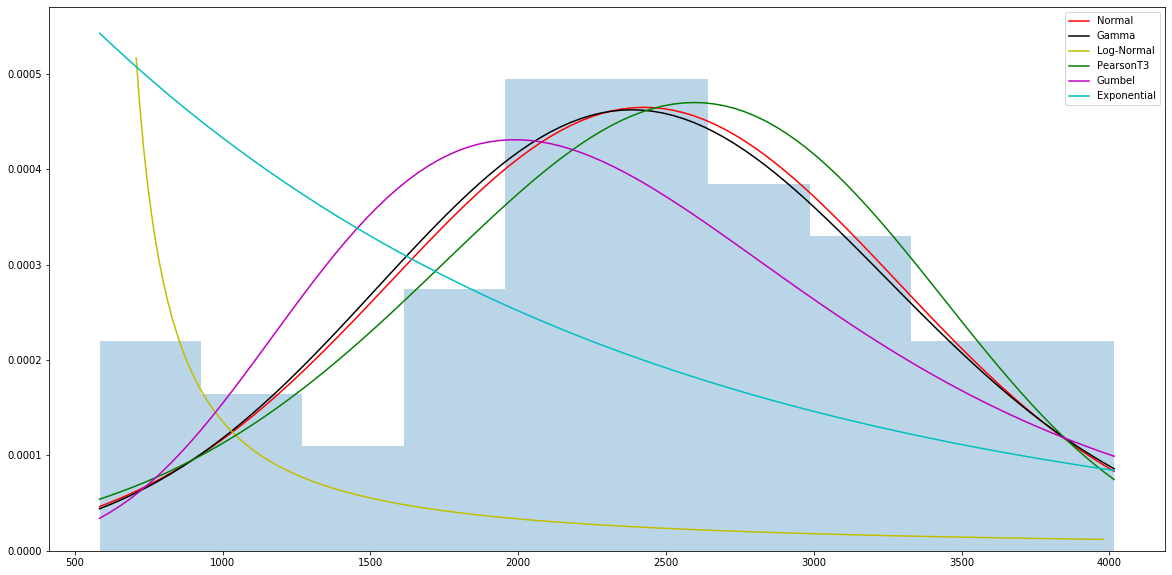

In [299]:
#Plotting all graph on the Histogram of Data

plt.figure(figsize=(20,10))
plt.plot(x, pdf_fitted,'r-',label="Normal")
plt.plot(x,pdf_fitted_gamma,'k-',label="Gamma")
plt.plot(x1,pdf_log,'y-',label="Log-Normal")
plt.plot(x,pdf_pearson,'g-',label="PearsonT3")
plt.plot(x,pdf_gumbel,'m-',label="Gumbel")
plt.plot(x,exp_pdf,'c-',label="Exponential")
plt.hist(Data1.iloc[:,0],density=1,alpha=0.3)
plt.legend()
plt.show()

### Chi-Square Test 

#### Null Hypothesis: 
Ho  = The Population is <b>that distribution</b> (given in argument) having parameters which we find out.

If we have sufficent imformation i.e. cricitical value at given significance is greater than test statistic than we do not reject null hypothesis if not then reject null hypothesis. 

<b>Rejecting Null hypothesis</b> showing that upto that <b>significance</b> I have not had that <b>much of evidence to accept Ho</b>.

#### Alternate Hypothesis:
Ha  = The Population <b>does not have that distribution</b> 

In [354]:
#Observed and Expected Frequencies 
freq_norm = []
freq_gamma = []
freq_lognorm = []
freq_pearson = []
freq_gumbel = []
freq_exp = []

for i in range(9):
    p = (i+1)/10
    observed_norm, expected_norm = sum(norm.cdf(x,loc=param[0],scale=param[1])>=p and norm.cdf(x,loc=param[0],scale=param[1])<=(p+0.1) for x in Data1.iloc[:,0]), 50*0.1
    observed_gamma, expected_gamma = sum(gamma.cdf(x, fit_alpha, loc=fit_loc, scale=fit_beta)>=p and gamma.cdf(x, fit_alpha, loc=fit_loc, scale=fit_beta)<=(p+0.1) for x in Data1.iloc[:,0]), 50*0.1
    observed_lognorm, expected_lognorm = sum(lognorm.cdf(x, shape, loc=loc, scale=scale)>=p and lognorm.cdf(x, shape, loc=loc, scale=scale)<=(p+0.1) for x in Data1.iloc[:,0]), 50*0.1
    observed_pearson, expected_pearson = sum(pearson3.cdf(x, param_pearson[0], param_pearson[-2],param_pearson[-1])>=p and pearson3.cdf(x, param_pearson[0], param_pearson[-2],param_pearson[-1])<=(p+0.1) for x in Data1.iloc[:,0]), 50*0.1
    observed_gumbel, expected_gumbel = sum(gumbel_r.cdf(x,loc=param_gumbel[0],scale=param_gumbel[1])>=p and gumbel_r.cdf(x,loc=param_gumbel[0],scale=param_gumbel[1])<=(p+0.1) for x in Data1.iloc[:,0]), 50*0.1
    observed_exp, expected_exp = sum(expon.cdf(x,loc=param_exp[0],scale=param_exp[1])>=p and expon.cdf(x,loc=param_exp[0],scale=param_exp[1])<=(p+0.1) for x in Data1.iloc[:,0]), 50*0.1

    freq_norm.append((observed,expected))
    freq_gamma.append((observed_gamma, expected_gamma))
    freq_lognorm.append((observed_lognorm, expected_lognorm))
    freq_pearson.append((observed_pearson, expected_pearson))
    freq_gumbel.append((observed_gumbel, expected_gumbel))
    freq_exp.append((observed_exp, expected_exp))

In [356]:
def Hypothesis(chi_square, crit):
    if chi_square <=crit :
        print('Accept Null Hypothesis')
    else:
        print('Reject Null Hypothesis')

crit = chi2.ppf(0.95,7)

#Normal Distribution
print('---'*40)
chi_square_norm = sum([(x[0]-x[1])**2/x[1] for x in freq_norm])
p_value = 1 - chi2.cdf(chi_square_norm,7)
print('Normal Distribution: Test_Statistic value {} Critical Value {} P Value {}'.format(round(chi_square_norm,2),round(crit,2),round(p_value,2)))
Hypothesis(chi_square_norm,crit)

#Gamma Distribution
print('---'*40)
chi_square_gamma = sum([(x[0]-x[1])**2/x[1] for x in freq_gamma])
p_value = 1 - chi2.cdf(chi_square_gamma,7)
print('Gamma Distribution: Test_Statistic value {} Critical Value {} P Value {}'.format(round(chi_square_gamma,2),round(crit,2),round(p_value,2)))
Hypothesis(chi_square_gamma,crit)

#Log-Normal Distribution
print('---'*40)
chi_square_lognorm = sum([(x[0]-x[1])**2/x[1] for x in freq_lognorm])
p_value = 1 - chi2.cdf(chi_square_lognorm,7)
print('Log-Normal Distribution: Test_Statistic value {} Critical Value {} P Value {}'.format(round(chi_square_lognorm,2),round(crit,2),round(p_value,2)))
Hypothesis(chi_square_lognorm,crit)

#PearsonT3 Distribution
print('---'*40)
chi_square_pearson = sum([(x[0]-x[1])**2/x[1] for x in freq_pearson])
p_value = 1 - chi2.cdf(chi_square_pearson,7)
print('PearsonT3 Distribution: Test_Statistic value {} Critical Value {} P Value {}'.format(round(chi_square_pearson,2),round(crit,2), round(p_value,2)))
Hypothesis(chi_square_pearson,crit)

#Gumbel Distribution 
print('---'*40)
chi_square_gumbel = sum([(x[0]-x[1])**2/x[1] for x in freq_gumbel])
p_value = 1 - chi2.cdf(chi_square_gumbel,7)
print('Gumbel Distribution: Test_Statistic value {} Critical Value {} P Value {}'.format(round(chi_square_gumbel,2),round(crit,2),round(p_value,2)))
Hypothesis(chi_square_gumbel,crit)

#Exponential Distribution 
print('---'*40)
chi_square_exp = sum([(x[0]-x[1])**2/x[1] for x in freq_exp])
p_value = 1 - chi2.cdf(chi_square_exp,7)
print('Exponential Distribution: Test_Statistic value {} Critical Value {} P Value {}'.format(round(chi_square_norm,2),round(crit,2), round(p_value,2)))
Hypothesis(chi_square_exp,crit)


------------------------------------------------------------------------------------------------------------------------
Normal Distribution: Test_Statistic value 47.7 Critical Value 14.07 P Value 0.0
Reject Null Hypothesis
------------------------------------------------------------------------------------------------------------------------
Gamma Distribution: Test_Statistic value 4.2 Critical Value 14.07 P Value 0.76
Accept Null Hypothesis
------------------------------------------------------------------------------------------------------------------------
Log-Normal Distribution: Test_Statistic value 341.0 Critical Value 14.07 P Value 0.0
Reject Null Hypothesis
------------------------------------------------------------------------------------------------------------------------
PearsonT3 Distribution: Test_Statistic value 6.8 Critical Value 14.07 P Value 0.45
Accept Null Hypothesis
-------------------------------------------------------------------------------------------------

### Kolmogorov-Smirnov Test

#### Null Hypothesis: 
Ho  = The Population is <b>that distribution</b> (given in argument) having parameters which we find out.

If we have sufficent imformation i.e. cricitical value at given significance is greater than test statistic than we do not reject null hypothesis if not then reject null hypothesis. 

<b>Rejecting Null hypothesis</b> showing that upto that <b>significance</b> I have not had that <b>much of evidence to accept Ho</b>.

#### Alternate Hypothesis:
Ha  = The Population <b>does not have that distribution</b> 

In [338]:
#Test Statistic Value of each distribution
dn_ks_norm = kstest(Data1.iloc[:,0], lambda x: norm.cdf(x, loc=param[0], scale=param[1]))
dn_ks_gamma = kstest(Data1.iloc[:,0], lambda x: gamma.cdf(x, fit_alpha, loc=fit_loc, scale=fit_beta))
dn_ks_lognorm = kstest(Data1.iloc[:,0], lambda x: lognorm.cdf(x, shape, loc=loc, scale=scale))
dn_ks_pearson = kstest(Data1.iloc[:,0], lambda x: pearson3.cdf(x, param_pearson[:-2], param_pearson[-2],param_pearson[-1]))
dn_ks_gumbel = kstest(Data1.iloc[:,0], lambda x: gumbel_r.cdf(x,loc=param_gumbel[0],scale=param_gumbel[1]))
dn_ks_exp = kstest(Data1.iloc[:,0], lambda x: expon.cdf(x,loc=param_exp[0],scale=param_exp[1]))

dn_ks_cric = 1.36/np.sqrt(53) #Critical Value

def Hypothesis(dn_ks,dn_ks_cric):
    if dn_ks <= dn_ks_cric :
        print('Accept Null Hypothesis')
    else:
        print('Reject Null Hypothesis')

print('---'*40)
print('Normal Distribution: Test Statistic value {} P-value {} Critical KS Value {}'.format(round(dn_ks_norm[0],2) ,round(dn_ks_norm[1],2), round(dn_ks_cric,2)))
Hypothesis(dn_ks_norm[0],dn_ks_cric)

print('---'*40)
print('Gamma Distribution: Test Statistic value {} P-value {} Critical KS Value {}'.format(round(dn_ks_gamma[0],2) ,round(dn_ks_gamma[1],2) ,round(dn_ks_cric,2)))
Hypothesis(dn_ks_gamma[0],dn_ks_cric)

print('---'*40)
print('Log Normal Distribution: Test Statistic value {} P-value {} Critical KS Value {}'.format(round(dn_ks_lognorm[0],2) ,round(dn_ks_lognorm[1],2) ,round(dn_ks_cric,2)))
Hypothesis(dn_ks_lognorm[0],dn_ks_cric)

print('---'*40)
print('PearsonT3 Distribution: Test Statistic value {} P-value {} Critical KS Value {}'.format(round(dn_ks_pearson[0],2) ,round(dn_ks_pearson[1],2) ,round(dn_ks_cric,2)))
Hypothesis(dn_ks_pearson[0],dn_ks_cric)

print('---'*40)
print('Gumbel Distribution: Test Statistic value {} P-value {} Critical KS Value {}'.format(round(dn_ks_gumbel[0],2) ,round(dn_ks_gumbel[1],2), round(dn_ks_cric,2)))
Hypothesis(dn_ks_gumbel[0],dn_ks_cric)

print('---'*40)
print('Exponential Distribution: Test Statistic value {} P-value {} Critical KS Value {}'.format(round(dn_ks_exp[0],2) ,round(dn_ks_exp[1],2), round(dn_ks_cric,2)))
Hypothesis(dn_ks_exp[0],dn_ks_cric)

------------------------------------------------------------------------------------------------------------------------
Normal Distribution: Test Statistic value 0.09 P-value 0.81 Critical KS Value 0.19
Accept Null Hypothesis
------------------------------------------------------------------------------------------------------------------------
Gamma Distribution: Test Statistic value 0.09 P-value 0.76 Critical KS Value 0.19
Accept Null Hypothesis
------------------------------------------------------------------------------------------------------------------------
Log Normal Distribution: Test Statistic value 0.69 P-value 0.0 Critical KS Value 0.19
Reject Null Hypothesis
------------------------------------------------------------------------------------------------------------------------
PearsonT3 Distribution: Test Statistic value 0.98 P-value 0.0 Critical KS Value 0.19
Reject Null Hypothesis
----------------------------------------------------------------------------------------

### Anderson Darling Test 

#### Null Hypothesis: 
Ho  = The Population is <b>that distribution</b> (given in argument) having parameters which we find out.

If we have sufficent imformation i.e. cricitical value at given significance is greater than test statistic than we do not reject null hypothesis if not then reject null hypothesis. 

<b>Rejecting Null hypothesis</b> showing that upto that <b>significance</b> I have not had that <b>much of evidence to accept Ho</b>.

#### Alternate Hypothesis:
Ha  = The Population <b>does not have that distribution</b> 

In [306]:
print('---'*40)
statistic, critical_values, significance_value = anderson(Data1.iloc[:,0] , dist='norm')  
print('Normal Distribution : Test Statistic: {} Critical_Value: {} Significance(%): {}'.format(statistic, critical_values[2], significance_value[2]))

if statistic <= critical_values[2] :
    print('Accept Null Hypothesis meaning Best Fit Distribution may be Normal')
else:
    print('Reject Null Hypothesis')

print('---'*40)  
statistic, critical_values, significance_value = anderson(Data1.iloc[:,0] , dist='gumbel_r')
print('Gumbel Distribution : Test Statistic: {} Critical_Value: {} Significance(%): {}'.format(statistic, critical_values[2], significance_value[2]))

if statistic <= critical_values[2] :
    print('Accept Null Hypothesis meaning Best Fit Distribution may be Gumbel')
else:
    print('Reject Null Hypothesis')

print('---'*40)
statistic, critical_values, significance_value = anderson(Data1.iloc[:,0] , dist='expon')  
print('Exponential Distribution : Test Statistic: {} Critical_Value: {} Significance(%): {}'.format(statistic, critical_values[2], significance_value[2]))

if statistic <= critical_values[2] :
    print('Accept Null Hypothesis meaning Best Fit Distribution may be Exponential')
else:
    print('Reject Null Hypothesis')

------------------------------------------------------------------------------------------------------------------------
Normal Distribution : Test Statistic: 0.28503260388117013 Critical_Value: 0.738 Significance(%): 5.0
Accept Null Hypothesis meaning Best Fit Distribution may be Normal
------------------------------------------------------------------------------------------------------------------------
Gumbel Distribution : Test Statistic: 1.1415931736598068 Critical_Value: 0.737 Significance(%): 5.0
Reject Null Hypothesis
------------------------------------------------------------------------------------------------------------------------
Exponential Distribution : Test Statistic: 9.80972677185094 Critical_Value: 1.326 Significance(%): 5.0
Reject Null Hypothesis


### BIC Value

In [365]:
#Gamma Distribution BIC Value 
LLH = gamma.logpdf(Data1,fit_alpha,fit_loc, fit_beta).sum()
BIC_Gamma = -2*LLH + np.log(len(Data1))*2

#Normal Distribution BIC Value
LIH1 = norm.logpdf(Data1,param[0],param[1]).sum()
BIC_Norm = -2*LIH1 + np.log(len(Data1))*2

#Pearson T3 Distribution BIC Value
LIH2 = pearson3.logpdf(Data1,param_pearson[0],param_pearson[1], param_pearson[2]).sum()
BIC_Pearson = -2*LIH2 + np.log(len(Data1))*2

BIC_Norm, BIC_Gamma, BIC_Pearson 

(874.3010141185783, 874.757176668683, 873.5122657222271)

### Result 

As Chi-Square Test and Ks-test both accept null hypothesis for <b>Gamma Distribution</b>.
with p value = 0.75 so out of all distribution we can say Gamma Distribution fits best to the Data1

### Best Fit Distribution for Data1 - "Gamma Distribution"

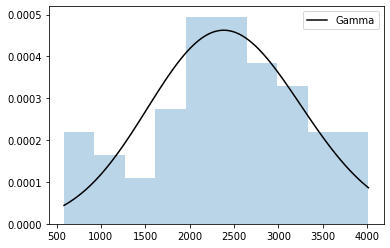

In [366]:
plt.plot(x,pdf_fitted_gamma,'k-',label="Gamma")
plt.hist(Data1.iloc[:,0],density=1,alpha=0.3)
plt.legend()
plt.show()

<b>P(X<=Value) = 0.95 </b>
Finding Value such P(X<=Value) = 0.95 

In [370]:
#98% Probability Value means P(X<=Value) = 0.95
Value = gamma.ppf(0.95, fit_alpha,fit_loc, fit_beta)
print('P(X<=Value) = 0.95 for that X is:',round(Value,2))

P(X<=Value) = 0.95 for that X is: 3874.19
